# Assignment 1-5: My Own Networks

이번 과제에서는 PyTorch를 활용해서 CIFAR-10 데이터셋을 위한 나만의 분류기를 만들어봅니다.  
이 과제의 목표는 CIFAR-10 테스트 데이터셋에서 83% (acc 0.830 이상) 의 분류 정확도를 달성하는 것입니다.  
이 때, 네트워크의 전체 파라미터는 1,000,000 개를 넘지 않도록 합니다.

In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import torch
import torchvision
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['font.size'] = 16

import utils
import my_networks

In [5]:
# 모델의 파라미터 개수가 MAX_PARAMS 을 넘는지 체크합니다.
MAX_PARAMS = 1000000

def count_params(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

def check_param_budget(model):
    n = count_params(model)
    print(f"# params of the model: {n}")
    assert n <= MAX_PARAMS, f"Parameter budget exceeded: {n:,} > {MAX_PARAMS:,}"

## 구현 하기

`my_networks.py`를 구현하고 아래 코드 셀을 실행시킵니다.  
test acc가 학습 과정에서 **단 한번이라도 0.830을 넘으면 100점**으로 인정합니다.  
주의: 파라미터 수가 1,000,000개를 넘으면 (check_param_budget을 fail하면) 0점입니다.

참고: 데이터를 train/val/test로 나눠야하지만 과제 구현의 편의성을 위해 train/test으로만 나누었습니다.  
본 과제에서는 test acc를 보고 모델 튜닝을 하면 되겠습니다.

In [9]:
solver = my_networks.Solver(lr=5e-3,
                            epochs=40, 
                            batch_size=256,
                            weight_decay=1e-4)
check_param_budget(solver.model)

solver.train()

# params of the model: 897418
[epoch: 1] loss 1.2815, test acc 0.579
[epoch: 2] loss 0.9791, test acc 0.627
[epoch: 3] loss 0.9893, test acc 0.602
[epoch: 4] loss 0.8940, test acc 0.673
[epoch: 5] loss 0.9292, test acc 0.675
[epoch: 6] loss 1.0258, test acc 0.558
[epoch: 7] loss 0.8232, test acc 0.593
[epoch: 8] loss 0.9192, test acc 0.654
[epoch: 9] loss 0.6183, test acc 0.750
[epoch: 10] loss 0.7709, test acc 0.587
[epoch: 11] loss 0.4702, test acc 0.669
[epoch: 12] loss 0.5423, test acc 0.694
[epoch: 13] loss 0.5529, test acc 0.704
[epoch: 14] loss 0.3722, test acc 0.757
[epoch: 15] loss 0.3927, test acc 0.795
[epoch: 16] loss 0.2340, test acc 0.778
[epoch: 17] loss 0.2426, test acc 0.786
[epoch: 18] loss 0.3080, test acc 0.796
[epoch: 19] loss 0.2460, test acc 0.745
[epoch: 20] loss 0.2592, test acc 0.748
[epoch: 21] loss 0.1078, test acc 0.810
[epoch: 22] loss 0.1768, test acc 0.813
[epoch: 23] loss 0.1288, test acc 0.802
[epoch: 24] loss 0.0790, test acc 0.798
[epoch: 25] loss 0.

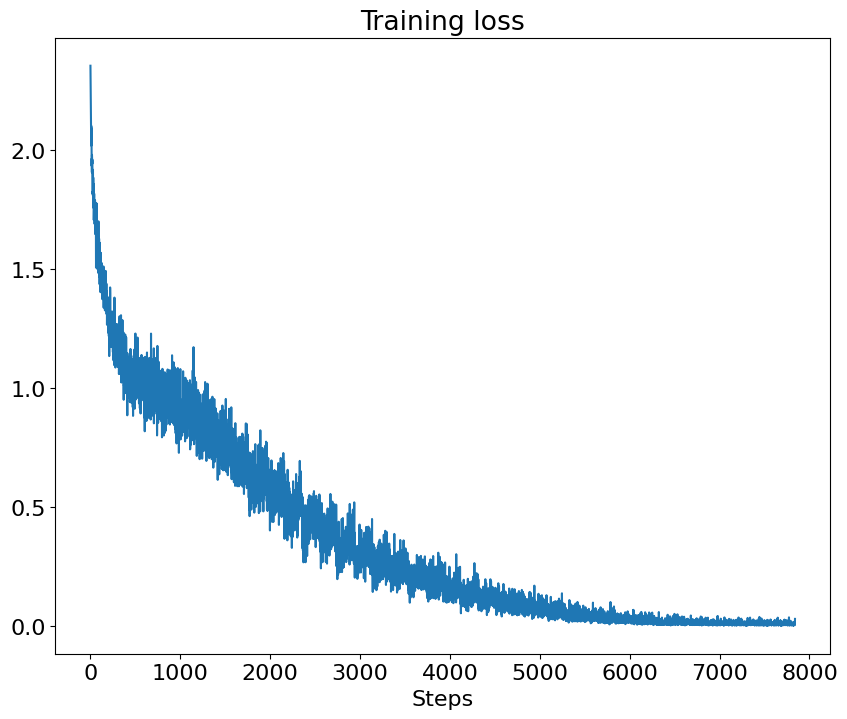

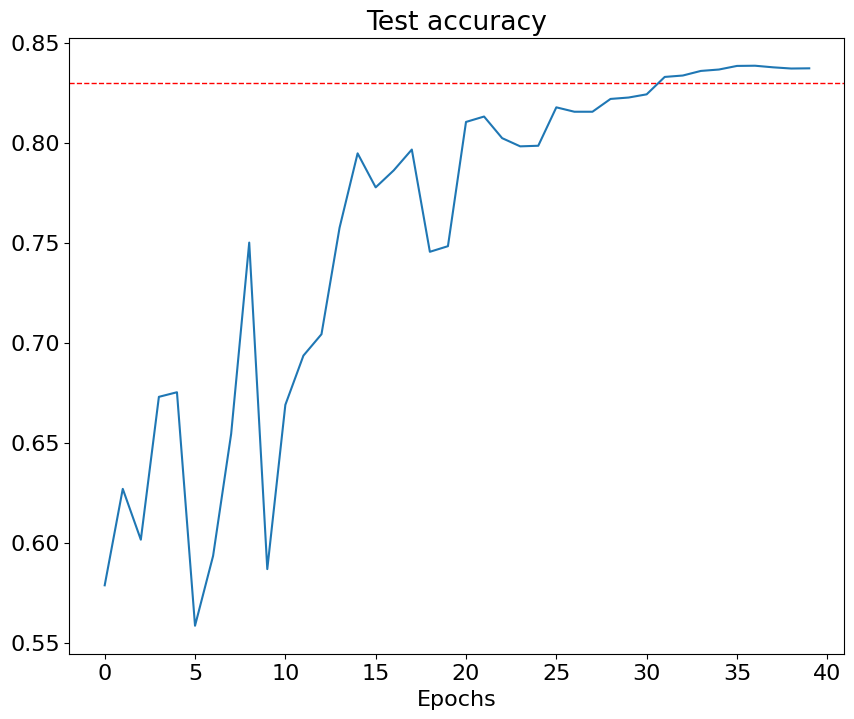

In [10]:
plt.figure()
plt.title('Training loss')
plt.xlabel('Steps')
plt.plot(solver.history["loss"])

plt.figure()
plt.title('Test accuracy')
plt.xlabel('Epochs')
plt.axhline(y=0.83, color="red", linestyle="--", linewidth=1)
plt.plot(solver.history["test_acc"])